In [35]:
import os

In [36]:
os.getcwd()


'C:\\Users\\ADMIN\\OneDrive\\Desktop\\ML Model'

In [37]:
os.chdir("C:/Users/ADMIN/OneDrive/Desktop/ML Model")

In [38]:
import pandas as pd

In [39]:
import numpy as np

In [40]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
stores=pd.read_csv("stores.csv")
holidays=pd.read_csv("holidays_events.csv")
oil=pd.read_csv("oil.csv")
transactions=pd.read_csv("transactions.csv")
sample=pd.read_csv("sample_submission.csv")


In [41]:
print("Train Missing Values:\n", train.isna().sum(), "\n")
print("Test Missing Values:\n", test.isna().sum(), "\n")
print("Stores Missing Values:\n", stores.isna().sum(), "\n")
print("Holidays Missing Values:\n", holidays.isna().sum(), "\n")
print("Oil Missing Values:\n", oil.isna().sum(), "\n")
print("Transactions Missing Values:\n", transactions.isna().sum(), "\n")
print("Sample Submission Missing Values:\n", sample.isna().sum(), "\n")


Train Missing Values:
 id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64 

Test Missing Values:
 id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64 

Stores Missing Values:
 store_nbr    0
city         0
state        0
type         0
cluster      0
dtype: int64 

Holidays Missing Values:
 date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64 

Oil Missing Values:
 date           0
dcoilwtico    43
dtype: int64 

Transactions Missing Values:
 date            0
store_nbr       0
transactions    0
dtype: int64 

Sample Submission Missing Values:
 id       0
sales    0
dtype: int64 



In [42]:
def detect_outliers_iqr(df):
    outliers = {}
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        outliers[col] = df[(df[col] < lower) | (df[col] > upper)][col].count()
    
    return outliers

In [43]:
print("Train Outliers:", detect_outliers_iqr(train))
print("Test Outliers:", detect_outliers_iqr(test))
print("Oil Outliers:", detect_outliers_iqr(oil))
print("Transactions Outliers:", detect_outliers_iqr(transactions))


Train Outliers: {'id': np.int64(0), 'store_nbr': np.int64(0), 'sales': np.int64(447105), 'onpromotion': np.int64(611329)}
Test Outliers: {'id': np.int64(0), 'store_nbr': np.int64(0), 'onpromotion': np.int64(3325)}
Oil Outliers: {'dcoilwtico': np.int64(0)}
Transactions Outliers: {'store_nbr': np.int64(0), 'transactions': np.int64(4583)}


In [44]:
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])
holidays['date'] = pd.to_datetime(holidays['date'])
oil['date'] = pd.to_datetime(oil['date'])
transactions['date'] = pd.to_datetime(transactions['date'])


In [45]:
# Merge stores
train = train.merge(stores, on='store_nbr', how='left')
test = test.merge(stores, on='store_nbr', how='left')

# Merge holidays
train = train.merge(holidays, on='date', how='left')
test = test.merge(holidays, on='date', how='left')

# Merge oil
train = train.merge(oil, on='date', how='left')
test = test.merge(oil, on='date', how='left')

# Merge transactions
train = train.merge(transactions, on=['date', 'store_nbr'], how='left')
test = test.merge(transactions, on=['date', 'store_nbr'], how='left')


In [46]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,dcoilwtico,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False,NaN,NaN


In [47]:
test.describe()

,id,date,store_nbr,onpromotion,cluster,dcoilwtico,transactions
count,2.851200e+04,28512,28512.000000,28512.000000,28512.000000,21384.000000,0.0
mean,3.015144e+06,2017-08-23 12:00:00,27.500000,6.965383,8.481481,47.243333,NaN
min,3.000888e+06,2017-08-16 00:00:00,1.000000,0.000000,1.000000,45.960000,NaN
25%,3.008016e+06,2017-08-19 18:00:00,14.000000,0.000000,4.000000,46.715000,NaN
50%,3.015144e+06,2017-08-23 12:00:00,27.500000,0.000000,8.500000,47.250000,NaN
75%,3.022271e+06,2017-08-27 06:00:00,41.000000,6.000000,13.000000,47.650000,NaN
max,3.029399e+06,2017-08-31 00:00:00,54.000000,646.000000,17.000000,48.590000,NaN
std,8.230850e+03,NaN,15.586057,20.683952,4.649816,0.753922,NaN


In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 17 columns):
 #   Column        Dtype         
---  ------        -----         
 0   id            int64         
 1   date          datetime64[ns]
 2   store_nbr     int64         
 3   family        object        
 4   sales         float64       
 5   onpromotion   int64         
 6   city          object        
 7   state         object        
 8   type_x        object        
 9   cluster       int64         
 10  type_y        object        
 11  locale        object        
 12  locale_name   object        
 13  description   object        
 14  transferred   object        
 15  dcoilwtico    float64       
 16  transactions  float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(9)
memory usage: 396.1+ MB


In [49]:
test.head()

,id,date,store_nbr,family,onpromotion,city,state,type_x,cluster,type_y,locale,locale_name,description,transferred,dcoilwtico,transactions
0,3000888,2017-08-16,1,AUTOMOTIVE,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,46.8,NaN
1,3000889,2017-08-16,1,BABY CARE,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,46.8,NaN
2,3000890,2017-08-16,1,BEAUTY,2,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,46.8,NaN
3,3000891,2017-08-16,1,BEVERAGES,20,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,46.8,NaN
4,3000892,2017-08-16,1,BOOKS,0,Quito,Pichincha,D,13,NaN,NaN,NaN,NaN,NaN,46.8,NaN


In [50]:
test.describe()

,id,date,store_nbr,onpromotion,cluster,dcoilwtico,transactions
count,2.851200e+04,28512,28512.000000,28512.000000,28512.000000,21384.000000,0.0
mean,3.015144e+06,2017-08-23 12:00:00,27.500000,6.965383,8.481481,47.243333,NaN
min,3.000888e+06,2017-08-16 00:00:00,1.000000,0.000000,1.000000,45.960000,NaN
25%,3.008016e+06,2017-08-19 18:00:00,14.000000,0.000000,4.000000,46.715000,NaN
50%,3.015144e+06,2017-08-23 12:00:00,27.500000,0.000000,8.500000,47.250000,NaN
75%,3.022271e+06,2017-08-27 06:00:00,41.000000,6.000000,13.000000,47.650000,NaN
max,3.029399e+06,2017-08-31 00:00:00,54.000000,646.000000,17.000000,48.590000,NaN
std,8.230850e+03,NaN,15.586057,20.683952,4.649816,0.753922,NaN


In [51]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            28512 non-null  int64         
 1   date          28512 non-null  datetime64[ns]
 2   store_nbr     28512 non-null  int64         
 3   family        28512 non-null  object        
 4   onpromotion   28512 non-null  int64         
 5   city          28512 non-null  object        
 6   state         28512 non-null  object        
 7   type_x        28512 non-null  object        
 8   cluster       28512 non-null  int64         
 9   type_y        1782 non-null   object        
 10  locale        1782 non-null   object        
 11  locale_name   1782 non-null   object        
 12  description   1782 non-null   object        
 13  transferred   1782 non-null   object        
 14  dcoilwtico    21384 non-null  float64       
 15  transactions  0 non-null      float6

In [52]:
train=train.rename(columns={'dcoilwtico':'oil_price'})
test=test.rename(columns={'dcoilwtico':'oil_price'})

In [53]:
train['oil_price'] = train['oil_price'].fillna(train['oil_price'].median())
test['oil_price'] = test['oil_price'].fillna(test['oil_price'].median())
train['transactions'] = train['transactions'].fillna(0)
test['transactions'] = test['transactions'].fillna(0)


In [54]:
train.isna().sum()


id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
city                  0
state                 0
type_x                0
cluster               0
type_y          2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
oil_price             0
transactions          0
dtype: int64

In [55]:
test.isna().sum()

id                  0
date                0
store_nbr           0
family              0
onpromotion         0
city                0
state               0
type_x              0
cluster             0
type_y          26730
locale          26730
locale_name     26730
description     26730
transferred     26730
oil_price           0
transactions        0
dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder


In [57]:
le = LabelEncoder()


In [58]:
categorical_cols = train.select_dtypes(include=['object']).columns

for col in categorical_cols:
    train[col] = le.fit_transform(train[col].astype(str))
for col in categorical_cols:
    test[col] = le.fit_transform(test[col].astype(str))


In [59]:
from sklearn.preprocessing import StandardScaler


In [60]:
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns


In [61]:
numeric_cols = numeric_cols.drop('sales')


In [62]:
scaler = StandardScaler()

train[numeric_cols] = scaler.fit_transform(train[numeric_cols])
test[numeric_cols] = scaler.transform(test[numeric_cols])


In [63]:
train['year'] = train['date'].dt.year
train['month'] = train['date'].dt.month
train['day'] = train['date'].dt.day
train['day_of_week'] = train['date'].dt.dayofweek

test['year'] = test['date'].dt.year
test['month'] = test['date'].dt.month
test['day'] = test['date'].dt.day
test['day_of_week'] = test['date'].dt.dayofweek


In [64]:
train['date'] = pd.to_datetime(train['date']).astype('int64') // 10**9
test['date']  = pd.to_datetime(test['date']).astype('int64') // 10**9


In [65]:
train.dtypes


id              float64
date              int64
store_nbr       float64
family          float64
sales           float64
onpromotion     float64
city            float64
state           float64
type_x          float64
cluster         float64
type_y          float64
locale          float64
locale_name     float64
description     float64
transferred     float64
oil_price       float64
transactions    float64
year              int32
month             int32
day               int32
day_of_week       int32
dtype: object

In [66]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [67]:
from xgboost import XGBRegressor


In [71]:
from sklearn.model_selection import train_test_split


In [72]:
y = train['sales']
X = train.drop('sales', axis=1)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [73]:
y = train['sales']
X = train.drop('sales', axis=1)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


model = XGBRegressor(
    n_estimators=900,
    learning_rate=0.05,
    max_depth=8,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='reg:squarederror'
)

model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=50)


[0]	validation_0-rmse:1048.52559
[50]	validation_0-rmse:341.33099
[100]	validation_0-rmse:277.89331
[150]	validation_0-rmse:259.78243
[200]	validation_0-rmse:245.75317
[250]	validation_0-rmse:234.66450
[300]	validation_0-rmse:226.46553
[350]	validation_0-rmse:221.33243
[400]	validation_0-rmse:217.94017
[450]	validation_0-rmse:215.14210
[500]	validation_0-rmse:212.65614
[550]	validation_0-rmse:209.88278
[600]	validation_0-rmse:207.48158
[650]	validation_0-rmse:205.71154
[700]	validation_0-rmse:203.92078
[750]	validation_0-rmse:203.02050
[800]	validation_0-rmse:201.49500
[850]	validation_0-rmse:200.01525
[899]	validation_0-rmse:199.08521


,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.8
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [75]:
from sklearn.model_selection import train_test_split

y = train['sales']
X = train.drop('sales', axis=1)

# First split: train + temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Second split: validation + test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)


In [77]:
preds = model.predict(X_test)


In [78]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("MSE:", mse)
print("R2 Score:", r2)


MSE: 38716.65558833317
R2 Score: 0.967815117333477


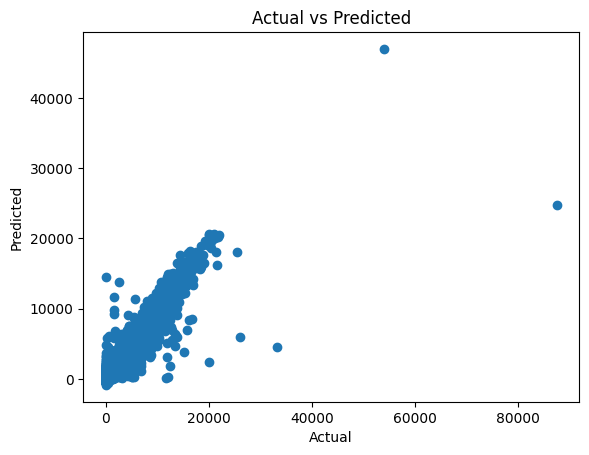

In [79]:
import matplotlib.pyplot as plt

plt.scatter(y_test, preds)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()
